> **Import libraries**

In [1]:
from __future__ import print_function
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from PIL import Image

## less Important
from functools import partial
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score

## tensorflow & Keras

import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

> # Read the training data

In [2]:
train_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/train.csv')
train_images = Path(r'../input/arabic-hwr-ai-pro-intake1/train')

## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/train/00000...
1    ../input/arabic-hwr-ai-pro-intake1/train/00001...
2    ../input/arabic-hwr-ai-pro-intake1/train/00002...
3    ../input/arabic-hwr-ai-pro-intake1/train/00003...
4    ../input/arabic-hwr-ai-pro-intake1/train/00004...
Name: Filepath, dtype: object

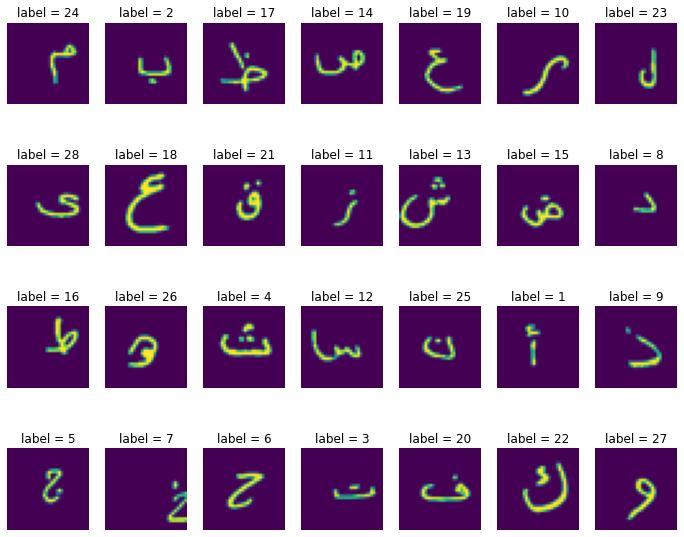

In [3]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 10))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}')
        img = plt.imread(train_images_paths.iloc[img_index[i]])
        plt.imshow(img)
        plt.axis('off')
        i+=1

In [4]:
print('#of Instances in train_set :', len(train_images_paths))
print('#of Instances in train_labels :', len(train_labels))

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is :', img.shape)

#of Instances in train_set : 13440
#of Instances in train_labels : 13440
shape of each Image is : (32, 32, 4)


In [5]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((13440, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    train_full_set[idx] = img
    
print('train_full_set.shape :', train_full_set.shape)
print('train_full_labels.shape :', train_full_labels.shape)

train_full_set.shape : (13440, 32, 32, 3)
train_full_labels.shape : (13440,)


> # Split Data

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.2, shuffle=True, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (10752, 32, 32, 3)
X_valid.shape => (2688, 32, 32, 3)
y_train.shape => (10752,)
y_valid.shape => (2688,)


> # Design the model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu',input_shape=(32, 32, 3)),
    Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', ),
    Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    
    tf.keras.layers.Flatten(),
 
    # Fully Connected Layer
    tf.keras.layers.Dense(units = 1100, activation = 'relu'),
    Dropout(0.4),

    
    tf.keras.layers.Dense(29, activation='sigmoid')
 
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

> # Optimization Algorithm

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                    epochs=100, batch_size=32, callbacks=[early_stopp])

2021-11-09 03:08:15.454383: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
336/336 [==============================] - 6s 16ms/step - loss: 2.0072 - accuracy: 0.3728 - val_loss: 1.3126 - val_accuracy: 0.6737
Epoch 2/100
336/336 [==============================] - 5s 15ms/step - loss: 0.9536 - accuracy: 0.6729 - val_loss: 0.9420 - val_accuracy: 0.7850
Epoch 3/100
336/336 [==============================] - 5s 15ms/step - loss: 0.7018 - accuracy: 0.7624 - val_loss: 0.7376 - val_accuracy: 0.8426
Epoch 4/100
336/336 [==============================] - 6s 17ms/step - loss: 0.5878 - accuracy: 0.7958 - val_loss: 0.6861 - val_accuracy: 0.8501
Epoch 5/100
336/336 [==============================] - 5s 16ms/step - loss: 0.4970 - accuracy: 0.8291 - val_loss: 0.5262 - val_accuracy: 0.8925
Epoch 6/100
336/336 [==============================] - 5s 15ms/step - loss: 0.4390 - accuracy: 0.8502 - val_loss: 0.4822 - val_accuracy: 0.8843
Epoch 7/100
336/336 [==============================] - 5s 15ms/step - loss: 0.4022 - accuracy: 0.8591 - val_loss: 0.4501 - val_accuracy:

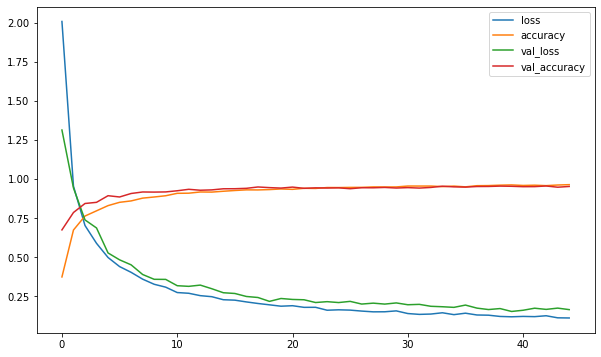

In [10]:
pd.DataFrame(history.history).plot(figsize=(10, 6));

> # Evaluate the maodel

In [11]:
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

loss_all_data => 0.07193980365991592
acc_all_data => 0.9860863089561462


> # Test Data

In [12]:
test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/test')

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/test/00000.png
1    ../input/arabic-hwr-ai-pro-intake1/test/00001.png
2    ../input/arabic-hwr-ai-pro-intake1/test/00002.png
3    ../input/arabic-hwr-ai-pro-intake1/test/00003.png
4    ../input/arabic-hwr-ai-pro-intake1/test/00004.png
Name: Filepath, dtype: object

In [13]:
len(test_images_paths)

3360

In [14]:
test_full_set = np.empty((3360, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(test_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    test_full_set[idx] = img
    
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 32, 32, 3)


In [15]:
y_preds_classes = np.argmax(model.predict(test_full_set), axis=-1)
test_labels['label'] = y_preds_classes

In [16]:
test_labels

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15
...,...,...
3355,3355,16
3356,3356,6
3357,3357,4
3358,3358,11


> # Submission

In [17]:
test_labels[['id', 'label']].to_csv('submission6.csv', index=False)